# Análise do PCA para dados relativos à Síndrome Metabólica
O presente documento apresenta as etapas e descrições para realização de uma análise de componentes principais (PCA) em um conjunto de dados relacionados à Síndrome Metabólica disponíveis originalmente em: https://www.kaggle.com/datasets/antimoni/metabolic-syndrome

Iniciamos instalando e importando bibliotecas essenciais para a análise de componentes principais (PCA) em Python. As bibliotecas incluem NumPy e Pandas para manipulação eficiente de dados, Matplotlib e Axes3D para visualização gráfica, entre outros. A principal funcionalidade é implementada por meio da importação das classes PCA e StandardScaler do módulo scikit-learn.

## PCA

In [ ]:
!pip install pandas scikit-learn numpy matplotlib seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans

Nesta etapa a variável "dados" é utilizada para armazenar um conjunto de dados que é lido a partir de um arquivo CSV denominado `data.csv` contendo os dados originais, por meio da função `pd.read_csv()` da biblioteca Pandas. A função `head(30)` é então empregada para exibir as trinta primeiras linhas do conjunto de dados, fornecendo uma visão inicial das informações contidas no arquivo. Esta etapa de leitura e visualização inicial é crucial para compreender a estrutura e a natureza dos dados que serão submetidos à análise de componentes principais (PCA).

In [2]:
dados = pd.read_csv("data.csv")
dados.head(30)

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0
5,62178,80,Male,Widowed,300.0,White,112.5,28.5,0,9.79,4.8,105,47,100,0
6,62184,26,Male,Single,9000.0,Black,78.6,22.1,0,9.21,5.4,87,61,40,0
7,62189,30,Female,Married,6200.0,Asian,80.2,22.4,0,8.78,6.7,83,48,91,0
8,62191,70,Male,Divorced,1000.0,Black,NaN,NaN,1,45.67,5.4,96,35,75,0
9,62195,35,Male,NaN,2500.0,Black,99.0,28.2,0,2.21,6.7,94,46,86,0


Nesta seção do código, são executadas etapas essenciais de pré-processamento de dados, um estágio crítico na preparação para a análise de componentes principais (PCA). Inicialmente, ocorre a seleção das colunas consideradas relevantes para a análise, destacando características específicas associadas ao metabolismo, como idade (`Age`), circunferência da cintura (`WaistCirc`), índice de massa corporal (`BMI`), albuminúria (`Albuminuria`), creatinina urinária de albumina (`UrAlbCr`), ácido úrico (`UricAcid`), glicose sanguínea (`BloodGlucose`), lipoproteína de alta densidade (`HDL`), e triglicerídeos (`Triglycerides`). A coluna alvo para a análise, relacionada à Síndrome Metabólica (`MetabolicSyndrome`), é especificada.

In [3]:
# Selecionando as colunas relevantes
colunas_numericas = ['Age', 'WaistCirc', 'BMI', 'Albuminuria', 'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL', 'Triglycerides']
# Coluna alvo
coluna_alvo = "MetabolicSyndrome"
# filtragem das colunas numéricas
dados[colunas_numericas] = dados[colunas_numericas].fillna(dados[colunas_numericas].mean())
dados = dados[[coluna_alvo] + colunas_numericas]

Nesta seção do código, é realizada a computação e exibição da matriz de correlação entre as variáveis presentes no conjunto de dados. A matriz de correlação, representada pela variável `correlacao` é um componente crítico na análise exploratória de dados e desempenha um papel fundamental na compreensão das relações lineares entre diferentes variáveis. A função `dados.corr()` calcula os coeficientes de correlação de Pearson entre todas as combinações de variáveis numéricas no conjunto de dados. 

In [4]:
# Calculando e exibindo a tabela de correlação
correlacao = dados.corr()
correlacao

,MetabolicSyndrome,Age,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
MetabolicSyndrome,1.000000,0.248618,0.490490,0.428976,0.158501,0.085168,0.246423,0.362219,-0.371378,0.427241
Age,0.248618,1.000000,0.220881,0.079479,0.233464,0.118380,0.147928,0.236610,0.079368,0.069885
WaistCirc,0.490490,0.220881,1.000000,0.882640,0.117564,0.042029,0.347906,0.250168,-0.342227,0.230946
BMI,0.428976,0.079479,0.882640,1.000000,0.076169,0.038048,0.269618,0.208784,-0.290774,0.163208
Albuminuria,0.158501,0.233464,0.117564,0.076169,1.000000,0.536214,0.176760,0.198642,-0.024188,0.107842
UrAlbCr,0.085168,0.118380,0.042029,0.038048,0.536214,1.000000,0.130928,0.106458,0.001667,0.077873
UricAcid,0.246423,0.147928,0.347906,0.269618,0.176760,0.130928,1.000000,0.055943,-0.252587,0.207328
BloodGlucose,0.362219,0.236610,0.250168,0.208784,0.198642,0.106458,0.055943,1.000000,-0.213905,0.269506
HDL,-0.371378,0.079368,-0.342227,-0.290774,-0.024188,0.001667,-0.252587,-0.213905,1.000000,-0.388487
Triglycerides,0.427241,0.069885,0.230946,0.163208,0.107842,0.077873,0.207328,0.269506,-0.388487,1.000000


É gerado um mapa de calor da matriz de correlação previamente calculada, utilizando a biblioteca Seaborn. O mapa de calor é uma representação visual que atribui cores diferentes às células da matriz de correlação de acordo com os valores numéricos associados. A intensidade e a tonalidade das cores refletem a força e a direção das relações lineares entre as variáveis, proporcionando uma representação gráfica mais acessível e interpretável em comparação com a matriz de correlação tabular.

<Axes: >

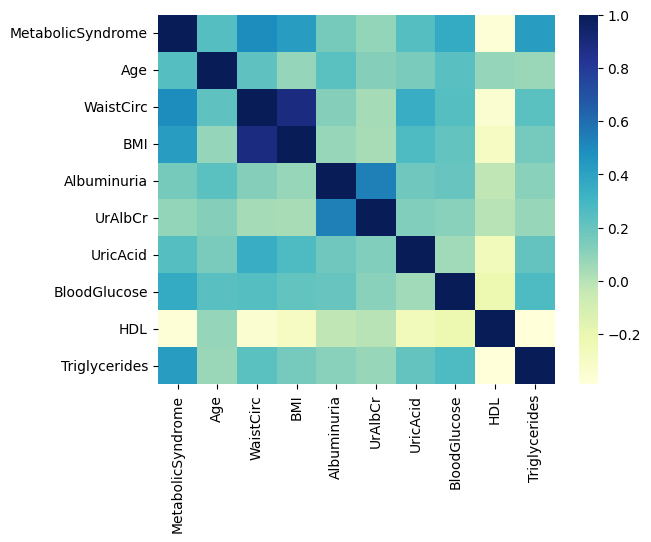

In [5]:
# Mapa de calor da correlação
sns.heatmap(correlacao, 
            xticklabels=correlacao.columns,
            yticklabels=correlacao.columns,
            cmap="YlGnBu"
)

A dimensão do conjunto de dados após a seleção e pré-processamento é exibida por meio da função print(dados.shape). A dimensão refere-se à estrutura do conjunto de dados, especificamente ao número de observações (linhas) e variáveis (colunas) presentes. Em um contexto de ciência de dados, o termo "dimensão" é frequentemente utilizado para descrever a complexidade ou a extensão de um conjunto de dados. 
A saída `(2401, 10)` representa uma tupla indicando que o conjunto de dados possui 2401 observações e 10 variáveis.

In [6]:
# Dimensão dos dados selecionados
print(dados.shape)

(2401, 10)


Nesta seção do código, realiza-se a preparação dos dados para a aplicação da técnica de Análise de Componentes Principais (PCA) em um contexto de ciência de dados. Inicialmente, ocorre a subdivisão do conjunto de dados entre as variáveis independentes (X), representadas pelas colunas numéricas previamente selecionadas, e a variável dependente (y), associada à Síndrome Metabólica. Essa divisão é crucial para distinguir as características a serem analisadas das variáveis que constituem o alvo da predição.

Em seguida, procede-se à padronização das variáveis independentes (X) por meio da instância do objeto `StandardScaler` da biblioteca scikit-learn. A padronização é uma prática comum na preparação de dados para o PCA, garantindo que todas as variáveis tenham média zero e desvio padrão unitário. Este processo é fundamental para assegurar que as variáveis estejam em uma escala comparável, evitando que aquelas com unidades de medida diferentes influenciem desproporcionalmente os resultados da análise.

In [7]:
# Separando as variáveis independentes (X) e a variável dependente (y)
X = dados[colunas_numericas]
y = dados[coluna_alvo]

# Padronizando os dados para o PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Realiza-se a aplicação da técnica de Análise de Componentes Principais (PCA). O objeto PCA é instanciado, representado pela variável `pca`, e posteriormente aplicado aos dados padronizados (`X_scaled`) por meio da função `fit_transform`. A aplicação do PCA tem como intuito a transformação das variáveis originais em um novo conjunto de variáveis, denominadas componentes principais, que são ortogonais entre si e capturam a maior parte da variabilidade presente nos dados.

O PCA é uma técnica de redução de dimensionalidade que busca identificar as direções (ou eixos) ao longo das quais os dados apresentam a maior variância. As componentes principais resultantes são ordenadas em termos de sua importância, sendo as primeiras componentes responsáveis por capturar a maior parte da informação contida nos dados. Ao aplicar o PCA sobre os dados padronizados, busca-se simplificar a representação do conjunto de dados original, preservando as informações mais relevantes.

In [8]:
# Aplicando o PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

A variância explicada por cada componente principal obtido após a aplicação da Análise de Componentes Principais (PCA) é examinada e exibida. A variância explicada por cada componente principal é representada pelo array `explained_variance_ratio`. Cada valor nesse array indica a proporção da variância total dos dados que é capturada por cada componente principal.

Nesta seção do código, são examinadas as proporções de variância explicadas por cada componente principal resultante da aplicação da técnica de Análise de Componentes Principais (PCA). A variância explicada é um indicador crítico que quantifica a quantidade de informação contida em cada componente principal em relação à variabilidade total dos dados. A análise dessas proporções fornece insights sobre a importância relativa de cada componente na representação dos padrões presentes nos dados originais. 

O código exibe o número total de componentes principais gerados (nove no caso específico), seguido das proporções individuais de variância explicada por cada componente. Além disso, é apresentada a variância explicada acumulada, destacando a contribuição cumulativa de cada componente principal para a explicação total da variabilidade nos dados.

In [9]:
# Examinando a variância explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

print("Número de Componentes Principais: {}".format(len(explained_variance_ratio)))
print("Variância explicada por cada componente principal:")
for i, var_ratio in enumerate(explained_variance_ratio):
    print("Componente Principal {}: {:.2%}".format(i + 1, var_ratio))

print("\nVariância explicada acumulada:")
for i, cumulative_var in enumerate(cumulative_explained_variance):
    print("Componente Principal {}: {:.2%}".format(i + 1, cumulative_var))


Número de Componentes Principais: 9
Variância explicada por cada componente principal:
Componente Principal 1: 29.96%
Componente Principal 2: 17.74%
Componente Principal 3: 12.68%
Componente Principal 4: 11.35%
Componente Principal 5: 9.49%
Componente Principal 6: 6.73%
Componente Principal 7: 5.98%
Componente Principal 8: 4.96%
Componente Principal 9: 1.11%

Variância explicada acumulada:
Componente Principal 1: 29.96%
Componente Principal 2: 47.70%
Componente Principal 3: 60.38%
Componente Principal 4: 71.73%
Componente Principal 5: 81.22%
Componente Principal 6: 87.95%
Componente Principal 7: 93.93%
Componente Principal 8: 98.89%
Componente Principal 9: 100.00%


Abaixo, apresenta-se uma visualização em gráfico de linha da variância acumulada dos componentes principais.

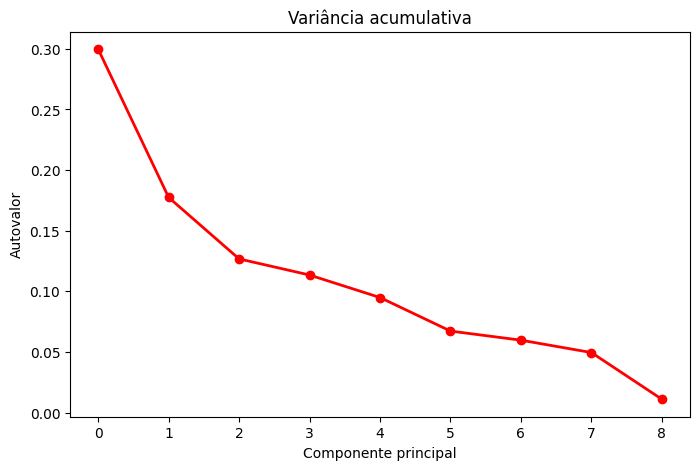

In [10]:
fig = plt.figure(figsize=(8,5))

plt.plot(pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title("Variância acumulativa")
plt.xlabel("Componente principal")
plt.ylabel("Autovalor")
plt.show()

Nesta seção do código, é realizada a escolha e manutenção de um número específico de componentes principais obtidos pela Análise de Componentes Principais (PCA). O valor atribuído à variável n_components define quantas dessas componentes principais serão retidas para análises subsequentes. Essa decisão é crucial, pois impacta diretamente na quantidade de informação retida e, portanto, na representação final do conjunto de dados em um espaço de dimensões reduzidas.

No código fornecido, o número de componentes principais é fixado em 3 (`n_components = 3`). Em seguida, a matriz `X_pca` é ajustada para manter apenas as primeiras três colunas, correspondentes aos três componentes principais escolhidos. Essa seleção é representativa da escolha de reter as três dimensões mais significativas na redução de dimensionalidade e adiciona-las ao DataFrame `dados`.

In [11]:
# Escolhendo o número de componentes principais a serem mantidos
n_components = 3
X_pca = X_pca[:, :n_components]

# Adicionando as componentes principais ao DataFrame
for i in range(n_components):
    dados[f'PC{i+1}'] = X_pca[:, i]

Nesta seção do código, são obtidos os autovalores e autovetores associados às componentes principais resultantes da aplicação da Análise de Componentes Principais (PCA). Os autovalores representam as variâncias explicadas por cada componente principal, enquanto os autovetores são os vetores próprios que indicam as direções das maiores variabilidades nos dados originais.

In [12]:
# Obtendo os autovalores e autovetores das componentes principais
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

# Exibindo informações sobre os autovalores
print("Autovalores (Variância Explicada por Componente Principal):")
for i, eigenvalue in enumerate(eigenvalues):
    print(f"Componente Principal {i + 1}: {eigenvalue:.4f}")

# Exibindo os autovetores correspondentes às componentes principais
print("\nAutovetores:")
for i, eigenvector in enumerate(eigenvectors):
    print(f"Componente Principal {i + 1}:", eigenvector)

Autovalores (Variância Explicada por Componente Principal):
Componente Principal 1: 2.6975
Componente Principal 2: 1.5975
Componente Principal 3: 1.1414
Componente Principal 4: 1.0218
Componente Principal 5: 0.8548
Componente Principal 6: 0.6059
Componente Principal 7: 0.5383
Componente Principal 8: 0.4465
Componente Principal 9: 0.1001

Autovetores:
Componente Principal 1: [ 0.19902105  0.50868515  0.4642411   0.23032726  0.16779264  0.32969422
  0.29940045 -0.3335565   0.30871732]
Componente Principal 2: [ 0.31164815 -0.2263488  -0.26758498  0.59527613  0.58400529  0.01531499
  0.12540025  0.25789319 -0.04642641]
Componente Principal 3: [-0.31865865 -0.34919549 -0.37684689  0.01732992  0.05903687 -0.01862812
  0.21461951 -0.48264747  0.59275863]
Componente Principal 4: [-0.54668477  0.03128659  0.10482646  0.17334979  0.34518985  0.37075411
 -0.60695118 -0.13461457 -0.12646227]
Componente Principal 5: [-0.47938472  0.137325    0.29045962  0.14063928  0.25036479 -0.68747387
  0.290469

Nesta seção do código, é criada uma visualização tridimensional das componentes principais obtidas pela Análise de Componentes Principais (PCA), colorindo os pontos de acordo com a presença ou ausência da Síndrome Metabólica. O mapa de cores personalizado utiliza a cor roxa para representar a classe 0 (ausência) e a cor laranja para a classe 1 (presença). A escolha dessas cores é estratégica para proporcionar uma representação visual clara e distintiva das duas classes.

O código utiliza a biblioteca Matplotlib para criar o gráfico tridimensional, onde cada ponto é representado pelas coordenadas das três primeiras componentes principais. A função scatter é empregada para gerar um gráfico de dispersão, onde a cor de cada ponto é determinada pela classe associada à Síndrome Metabólica. Dessa forma, é possível visualizar a distribuição dos dados no espaço tridimensional, considerando a estrutura de redução de dimensionalidade proporcionada pela PCA.

O intuito é, portanto, fornecer uma representação gráfica intuitiva e interpretável da relação entre as componentes principais e a variável de interesse, contribuindo para uma compreensão visual da estrutura dos dados em relação à Síndrome Metabólica.

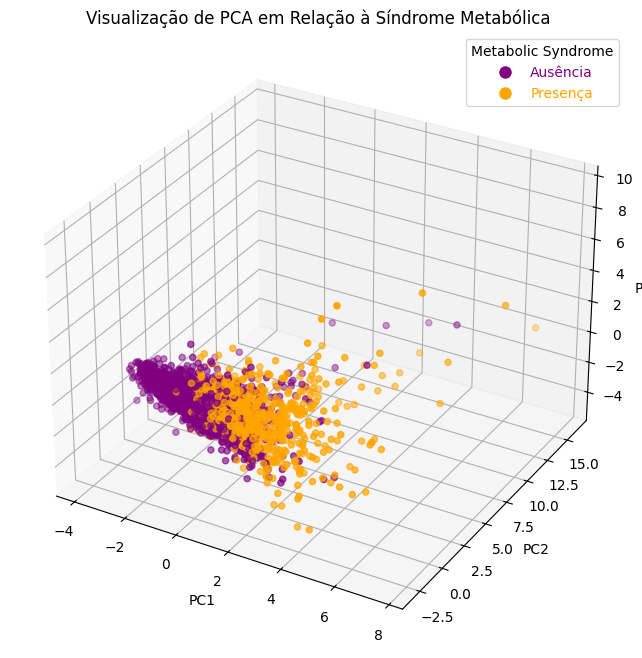

In [13]:
# Criando um mapa de cores personalizado com roxo para 0 e laranja para 1
custom_cmap = plt.cm.colors.ListedColormap(['purple', 'orange'])

# Plotando as componentes principais em 3D com cores que indicam a relação com a síndrome metabólica
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap=custom_cmap)

# Mapeando os valores 0 e 1 para "Ausência" e "Presença" na legenda
legend_labels = {0: 'Ausência', 1: 'Presença'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, 
                             markerfacecolor=color, markersize=10) for label, color in zip(legend_labels.values(), ['purple', 'orange'])]

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Visualização de PCA em Relação à Síndrome Metabólica')
legend = ax.legend(handles=legend_handles, title='Metabolic Syndrome')

# Ajustando as cores do texto da legenda
for text, color in zip(legend.get_texts(), ['purple', 'orange']):
    text.set_color(color)

plt.show()

### Análise visual
Com base na visualização do gráfico tridimensional gerado pela Análise de Componentes Principais (PCA), algumas observações podem ser inferidas:
- O fato de as duas nuvens seguirem quase a mesma tendência ao longo das três primeiras componentes principais sugere que a redução de dimensionalidade pela PCA preserva padrões globais nos dados originais.
- As duas nuvens de pontos, representando as classes "Ausência" e "Presença" da Síndrome Metabólica, estão predominantemente próximas, sugerindo que as amostras compartilham características semelhantes em termos das três primeiras componentes principais (PC1, PC2, e PC3).
- Embora as nuvens estejam próximas, a um indício de que elas não se sobrepõem significativamente. Isso sugere que há uma pequena distinção entre as características representativas de cada classe nas primeiras três componentes principais.


## K-means
Nesta seção do código, a técnica de agrupamento K-Means é aplicada às coordenadas das componentes principais separadamente para as classes "Ausência" e "Presença" da Síndrome Metabólica.

O intuito dessa seção é realizar a clusterização das coordenadas das componentes principais para cada classe, identificando padrões ou grupos que possam indicar estruturas distintas nas representações das variáveis originais. Essa abordagem de agrupamento é valiosa para a caracterização mais detalhada das relações presentes nos dados

Cálculo com o propósito de explorar as características médias das coordenadas das componentes principais para as classes "Ausência" (0) e "Presença" (1) da Síndrome Metabólica. Inicialmente, as coordenadas referentes a cada classe são extraídas da matriz das componentes principais (`X_pca`) com base na variável dependente (`y`).

In [14]:
# Separando as coordenadas para as classes 0 e 1
coordenadas_ausencia = X_pca[y == 0, :]
coordenadas_presenca = X_pca[y == 1, :]

# Calculando as médias para cada componente principal por classe
media_ausencia = coordenadas_ausencia.mean(axis=0)
media_presenca = coordenadas_presenca.mean(axis=0)
print("Nº de coordenadas para Ausência:", len(coordenadas_ausencia))
print("Nº de coordenadas para Ausência:", len(coordenadas_presenca))
# Exibindo as médias
print("Média para Ausência (Classe 0):", media_ausencia)
print("Média para Presença (Classe 1):", media_presenca)


Nº de coordenadas para Ausência: 1579
Nº de coordenadas para Ausência: 822
Média para Ausência (Classe 0): [-0.71747101  0.05097673 -0.07306067]
Média para Presença (Classe 1): [ 1.3782077  -0.09792245  0.14034403]


O número desejado de clusters, representado pela variável num_clusters, é definido como 8. O objetivo principal é identificar padrões ou agrupamentos naturais nas representações das componentes principais para cada classe, o que pode fornecer insights sobre a estrutura subjacente dos dados.

Para a classe de "Ausência," é realizado o ajuste do modelo K-Means utilizando as coordenadas correspondentes, especificando o número de clusters desejado, o número de inicializações (n_init) para mitigar a sensibilidade ao ponto de partida aleatório do algoritmo, e uma semente de aleatoriedade (random_state) para garantir a reprodutibilidade dos resultados. O mesmo procedimento é aplicado à classe de "Presença."

Os centróides resultantes, representados pelas variáveis centroides_ausencia e centroides_presenca, são obtidos a partir dos agrupamentos identificados pelo K-Means. Esses centróides são os pontos médios de cada cluster e podem ser interpretados como representantes das características centrais dos agrupamentos encontrados.

In [15]:
# Definindo o número de clusters desejado
num_clusters = 8

# Aplicando K-Means para cada classe
kmeans_ausencia = KMeans(n_clusters=num_clusters, n_init= 10, random_state=42).fit(coordenadas_ausencia)
kmeans_presenca = KMeans(n_clusters=num_clusters, n_init= 10, random_state=42).fit(coordenadas_presenca)

# Obtendo os centróides
centroides_ausencia = kmeans_ausencia.cluster_centers_
centroides_presenca = kmeans_presenca.cluster_centers_

Nesta seção do código, é gerada uma visualização tridimensional dos centróides resultantes da aplicação do algoritmo K-Means às coordenadas das componentes principais para as classes "Ausência" e "Presença" da Síndrome Metabólica. O objetivo é proporcionar uma representação gráfica dos agrupamentos identificados pelo K-Means, destacando os centróides como pontos centrais de cada cluster.

O resultado visual fornece insights sobre a estrutura subjacente dos dados e a eficácia do K-Means na identificação de padrões distintos nas representações de componentes principais.

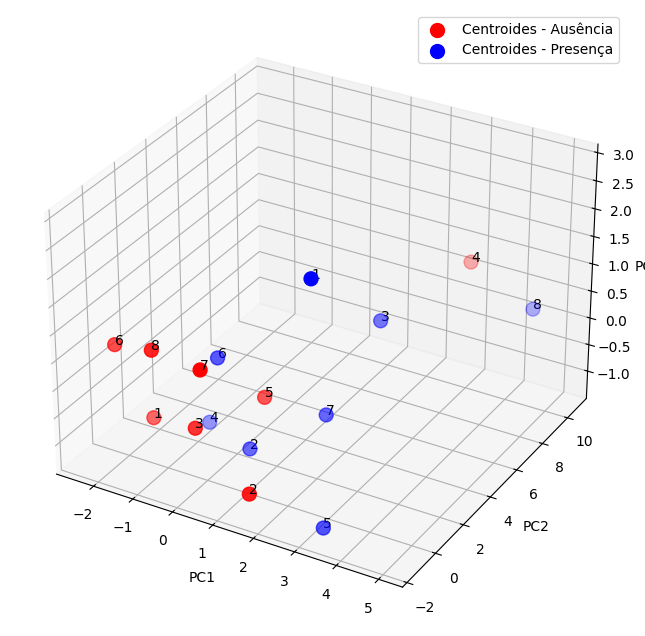

Centróides para Ausência (Classe 0) - 8 Centróides:
[[-1.5723902   0.5765877  -0.85861084]
 [ 1.38223757 -0.89373483 -1.22047603]
 [-0.21002023 -0.1946506  -0.555696  ]
 [ 2.85824579 10.65863608  0.67347367]
 [ 0.56145515  2.38584483 -0.43447046]
 [-2.41370558  0.30989462  0.36449672]
 [ 0.09764989 -0.5866619   0.66369438]
 [-1.26921959 -0.19687331  0.62955542]]

Centróides para Presença (Classe 1) - 8 Centróides:
[[ 2.82858724 -0.67881977  2.85361479]
 [ 1.37328539 -0.7908521  -0.42177647]
 [ 2.88962833  3.87926636  1.11656433]
 [-0.08676096  0.42681357 -0.56813314]
 [ 3.37682171 -1.42396194 -1.22504024]
 [ 0.50662461 -0.51275356  0.95050539]
 [ 2.59026877  0.98591052  0.03850177]
 [ 5.01979028  8.6464187   0.70166934]]


In [16]:
# Criando a figura e o subplot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotando os centroides para a classe "Ausência"
ax.scatter(*zip(*centroides_ausencia), s=100, c='red', marker='o', label='Centroides - Ausência')

# Adicionando números correspondentes aos clusters para a classe "Ausência"
for i, txt in enumerate(range(1, len(centroides_ausencia)+1)):
    ax.text(centroides_ausencia[i][0], centroides_ausencia[i][1], centroides_ausencia[i][2], str(txt), color='black')

# Plotando os centroides para a classe "Presença"
ax.scatter(*zip(*centroides_presenca), s=100, c='blue', marker='o', label='Centroides - Presença')

# Adicionando números correspondentes aos clusters para a classe "Presença"
for i, txt in enumerate(range(1, len(centroides_presenca)+1)):
    ax.text(centroides_presenca[i][0], centroides_presenca[i][1], centroides_presenca[i][2], str(txt), color='black')

# Adicionando rótulos aos eixos
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Adicionando uma legenda
ax.legend()

# Exibindo o gráfico
plt.show()
print(f"Centróides para Ausência (Classe 0) - {num_clusters} Centróides:")
print(centroides_ausencia)

print(f"\nCentróides para Presença (Classe 1) - {num_clusters} Centróides:")
print(centroides_presenca)

Nesta seção do código, são calculadas estatísticas descritivas para cada coordenadas das componentes principais, tanto para a classe "Ausência" quanto para a classe "Presença" da Síndrome Metabólica, com base nos centróides obtidos após a aplicação do algoritmo K-Means. As estatísticas incluem a média, o desvio padrão, o valor mínimo e o valor máximo para cada coordenada, proporcionando uma visão abrangente das características centrais e da variabilidade dos clusters identificados.

In [17]:
# Estatísticas descritivas para a classe Ausência (Classe 0)
mean_ausencia = np.mean(centroides_ausencia, axis=0)
std_ausencia = np.std(centroides_ausencia, axis=0)
min_ausencia = np.min(centroides_ausencia, axis=0)
max_ausencia = np.max(centroides_ausencia, axis=0)

# Estatísticas descritivas para a classe Presença (Classe 1)
mean_presenca = np.mean(centroides_presenca, axis=0)
std_presenca = np.std(centroides_presenca, axis=0)
min_presenca = np.min(centroides_presenca, axis=0)
max_presenca = np.max(centroides_presenca, axis=0)

# Imprimir as estatísticas para cada coordenada separadamente
num_coord = centroides_ausencia.shape[1]  # Número de coordenadas

for i in range(num_coord):
    print(f"Estatísticas para PC{i + 1}:")
    print(f"Média (Ausência): {mean_ausencia[i]:.4f}")
    print(f"Desvio Padrão (Ausência): {std_ausencia[i]:.4f}")
    print(f"Mínimo (Ausência): {min_ausencia[i]:.4f}")
    print(f"Máximo (Ausência): {max_ausencia[i]:.4f}")

    print(f"Média (Presença): {mean_presenca[i]:.4f}")
    print(f"Desvio Padrão (Presença): {std_presenca[i]:.4f}")
    print(f"Mínimo (Presença): {min_presenca[i]:.4f}")
    print(f"Máximo (Presença): {max_presenca[i]:.4f}")
    print("\n")


Estatísticas para PC1:
Média (Ausência): -0.0707
Desvio Padrão (Ausência): 1.5937
Mínimo (Ausência): -2.4137
Máximo (Ausência): 2.8582
Média (Presença): 2.3123
Desvio Padrão (Presença): 1.5427
Mínimo (Presença): -0.0868
Máximo (Presença): 5.0198


Estatísticas para PC2:
Média (Ausência): 1.5074
Desvio Padrão (Ausência): 3.5842
Mínimo (Ausência): -0.8937
Máximo (Ausência): 10.6586
Média (Presença): 1.3165
Desvio Padrão (Presença): 3.1716
Mínimo (Presença): -1.4240
Máximo (Presença): 8.6464


Estatísticas para PC3:
Média (Ausência): -0.0923
Desvio Padrão (Ausência): 0.7141
Mínimo (Ausência): -1.2205
Máximo (Ausência): 0.6735
Média (Presença): 0.4307
Desvio Padrão (Presença): 1.1887
Mínimo (Presença): -1.2250
Máximo (Presença): 2.8536




Criação do gráfico de barras para comparar as médias das coordenadas das componentes principais entre as classes "Ausência" e "Presença" da Síndrome Metabólica

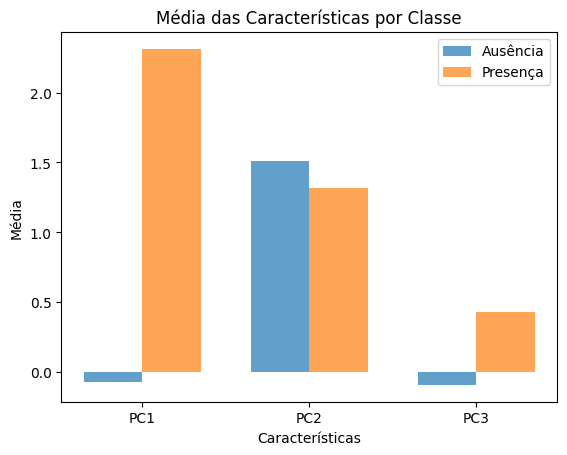

In [19]:
# Número de coordenadas
num_coord = centroides_ausencia.shape[1]

# Configurações para o gráfico de barras
bar_width = 0.35
index = np.arange(num_coord)

# Gráfico de barras para a média
plt.bar(index, mean_ausencia, bar_width, label='Ausência', alpha=0.7)
plt.bar(index + bar_width, mean_presenca, bar_width, label='Presença', alpha=0.7)

plt.xlabel('Características')
plt.ylabel('Média')
plt.title('Média das Características por Classe')
plt.xticks(index + bar_width / 2, [f'PC{i + 1}' for i in range(num_coord)])
plt.legend()
plt.show()

Geração de boxplots para cada característica (componente principal) com base nas estatísticas descritivas obtidas para as classes "Ausência" e "Presença" da Síndrome Metabólica. Os boxplots proporcionam uma representação visual das medidas resumidas, incluindo medianas, quartis e a variabilidade dos dados, permitindo uma análise comparativa das distribuições entre as classes.

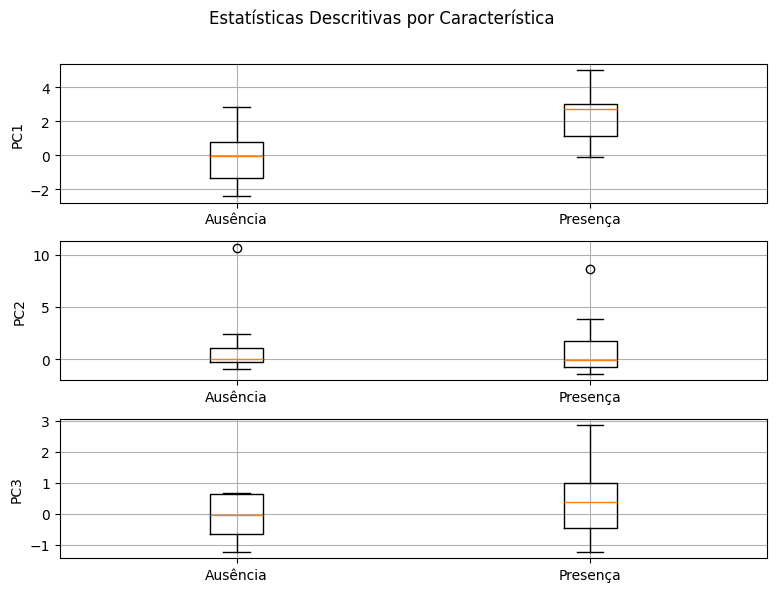

In [20]:
# Nomes das características
nomes_caracteristicas = [f"PC{i + 1}" for i in range(num_coord)]

# Criar um array com as estatísticas para cada classe
medias = np.vstack((mean_ausencia, mean_presenca))
stds = np.vstack((std_ausencia, std_presenca))
mins = np.vstack((min_ausencia, min_presenca))
maxs = np.vstack((max_ausencia, max_presenca))

# Configurar o gráfico
fig, axes = plt.subplots(nrows=num_coord, ncols=1, figsize=(8, 2 * num_coord))
fig.suptitle('Estatísticas Descritivas por Característica')

# Criar boxplots para cada característica
for i, ax in enumerate(axes):
    ax.boxplot([centroides_ausencia[:, i], centroides_presenca[:, i]], labels=['Ausência', 'Presença'])
    ax.set_ylabel(nomes_caracteristicas[i])
    ax.grid(True)

# Ajustar o layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


### Análise de centróides de Clusters

Ao analisar os centróides obtidos pelo K-Means para as classes de "Ausência" (Classe 0) e "Presença" (Classe 1), podemos extrair algumas conclusões preliminares sobre as tendências e padrões nas coordenadas das componentes principais (PCAs) associadas à Síndrome Metabólica baseando-se na análise estatística descritiva e visual realizada.


Para PC1 As amostras de "Presença" tendem a se posicionar mais nas coordenadas positivas, enquanto as amostras de "Ausência" têm uma distribuição mais equilibrada.
Para PC2 Amostras de "Ausência" e "Presença" têm médias próximas, mas a variabilidade é mais alta em "Ausência".
Para PC3 As amostras de "Presença" tendem a ter médias mais positivas e uma variabilidade um pouco maior em comparação com "Ausência".

## SVD
Nesta seção do código, é aplicada a técnica de Decomposição em Valores Singulares (SVD, do inglês Singular Value Decomposition) à matriz de dados padronizados (`X_scaled`). O SVD é uma técnica matemática fundamental que descompõe uma matriz em três componentes: a matriz de transformação à esquerda (U), a matriz diagonal contendo os valores singulares (Sigma), e a matriz de transformação à direita (Vt). Essa decomposição é uma ferramenta poderosa em análise de dados.

A matriz U contém os autovetores correspondentes às componentes principais, a matriz Sigma é uma matriz diagonal que contém os valores singulares (raízes quadradas dos autovalores), e a matriz Vt contém os autovetores associados às variáveis originais. A exibição dessas matrizes proporciona uma compreensão detalhada das relações lineares entre as variáveis originais e as componentes principais.

In [21]:
# Aplicando o SVD
U, Sigma, Vt = np.linalg.svd(X_scaled, full_matrices=False)

# Exibindo as matrizes U, Sigma e Vt
print("\nMatriz U:")
print(U)
print("\nMatriz Sigma (Valores Singulares):")
print(np.diag(Sigma))
print("\nMatriz Vt:")
print(Vt)



Matriz U:
[[-0.01848401 -0.00918132 -0.02253218 ... -0.01262323  0.00045925
   0.00486263]
 [-0.01558856 -0.00645486 -0.01892933 ... -0.05116336 -0.00611444
   0.01754115]
 [-0.02367857 -0.00317022 -0.03084201 ... -0.00449284 -0.00119019
   0.01732499]
 ...
 [-0.00168286 -0.01374647 -0.0024063  ...  0.00367919 -0.00114221
  -0.00967111]
 [ 0.005496   -0.0184524  -0.00678342 ...  0.00130945 -0.0008249
  -0.01278942]
 [ 0.00854896 -0.00910495 -0.01390007 ... -0.02566914 -0.00694839
  -0.02257445]]

Matriz Sigma (Valores Singulares):
[[80.46053194  0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.         61.91958794  0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.         52.33867162  0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.         49.52204861  0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0. 